# Análise  e Modelagem de Dados de Habitação

### Trabalho Realizado por:
- Bruno Monteiro Miranda nº 26014
- Daniel Aléxis Oliveira Pereira nº 26432
### Introdução
Neste projeto, foi realizada uma análise  e modelagem de dados utilizando um conjunto de dados de habitação na Califórnia. O objetivo principal foi explorar padrões nos dados, construir modelos preditivos, realizar clustering e aplicar técnicas de mineração de regras de associação.

### Estrutura do Projeto
O projeto está dividido nas seguintes etapas principais:

1. **Carregamento do Dataset**
   - Carregamento dos dados para serem trabalhados do dataset.

2. **Exploração de Dados**  
   - Análise estatística descritiva.
   - Visualização de distribuições e categorias.

3. **Pré-processamento de Dados**  
   - Tratamento de valores nulos.
   - Criação de novas features.
   - Escalonamento e codificação das variáveis.

4. **Divisão de Dados e Preparação**
   - Divisão de Dados em conjuntos de treino e teste.

5. **Modelagem Preditiva**  
   - Treino e avaliação de modelos de regressão (e.g., Regressão Linear, Árvores de Decisão, Random Forest).
   - Avaliação de métricas como R².

6. **Clustering**  
   - Análise do número ótimo de clusters (Método do Cotovelo e Silhueta).
   - Treino de um modelo K-Means.

7. **Mineração de Regras de Associação**  
   - Discretização de variáveis.
   - Aplicação do algoritmo Apriori para geração de regras.

8. **Classificação**  
   - Construção e avaliação de um modelo de classificação com base na variável `ocean_proximity`.

### Objetivo
O objetivo deste trabalho foi aplicar técnicas de análise de dados, machine learning e mineração de dados para compreender melhor o conjunto de dados e obter insights úteis. Além disso, foram avaliadas abordagens para prever o valor médio das casas e identificar padrões.



## Carregamento e Visualização Inicial dos Dados
Nesta seção, carregamos o dataset e exploramos suas características principais.


In [ ]:
# Load the dataset
df = pd.read_csv("housing.txt")


: 

## Análise Exploratória de Dados
Exploramos a distribuição dos dados numéricos e categóricos usando gráficos e estatísticas descritivas.


In [ ]:
# 2. Descriptive Statistics and Visualization
print(df.describe())

# Histograms for numerical features
df.hist(bins=50, figsize=(20, 15))
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

# Box plots for numerical features
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.suptitle("Box Plots of Numerical Features", y=1.02)
plt.show()

# Count plot for the categorical feature
plt.figure(figsize=(8, 6))
sns.countplot(x='ocean_proximity', data=df)
plt.title("Count of Ocean Proximity Categories")
plt.show()


## Pré-Processamento dos Dados
Lidamos com valores ausentes, criamos novas features e aplicamos escalonamento e codificação.


In [ ]:
# 3. Feature Engineering
df['rooms_per_household'] = df['total_rooms'] / df['households']

# OPTION 1: Remove rows with NaNs (if applicable)
df.dropna(inplace=True)

## Divisão de Dados e Preparação
Dividimos os dados em conjuntos de treino e teste, e aplicamos transformações como escalonamento e one-hot encoding.


In [ ]:
# 4. Data Splitting
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Feature Scaling and One-Hot Encoding
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = ['ocean_proximity']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing to training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


## Treinamento e Avaliação de Modelos
Treinamos diferentes modelos de regressão e avaliamos os seus desempenhos com métrica R².


In [ ]:
# 6. Model Training (Linear Regression, Decision Tree, Random Forest, HistGradientBoostingRegressor)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # 7. Model Evaluation (RMSE, R-squared)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    print("-" * 30)

## Clustering com K-Means
Aplicamos clustering para agrupar as observações com base em suas características.


In [ ]:
# --- Clustering (K-Means) ---
# 8. Determine optimal k using the Elbow method and Silhouette analysis
inertia = []
silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_train, kmeans.labels_))

## Mineração de Regras de Associação
Usamos o algoritmo Apriori para identificar padrões e regras frequentes nos dados discretizados.


In [ ]:
# 11. Apply Apriori algorithm
frequent_itemsets = apriori(X_apriori, min_support=0.1, use_colnames=True)

# 12. Generate association rules
num_transactions = len(df)  # Total rows in the original DataFrame
rules = association_rules(frequent_itemsets, num_transactions, metric="confidence", min_threshold=0.7)

# Display frequent itemsets and association rules
print("Frequent Itemsets:")
print(frequent_itemsets.head())
print("\nAssociation Rules:")
print(rules.head())


## Classificação com Random Forest
Utilizamos Random Forest para prever a proximidade do oceano com base em outras características.


In [ ]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_class, y_train_class)

# Predict and evaluate
y_pred_class = rf_classifier.predict(X_test_class)
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))


## Grafos Gerados

### Histogramas das Variáveis Numéricas

Mostra a distribuição das variáveis numéricas no conjunto de dados.

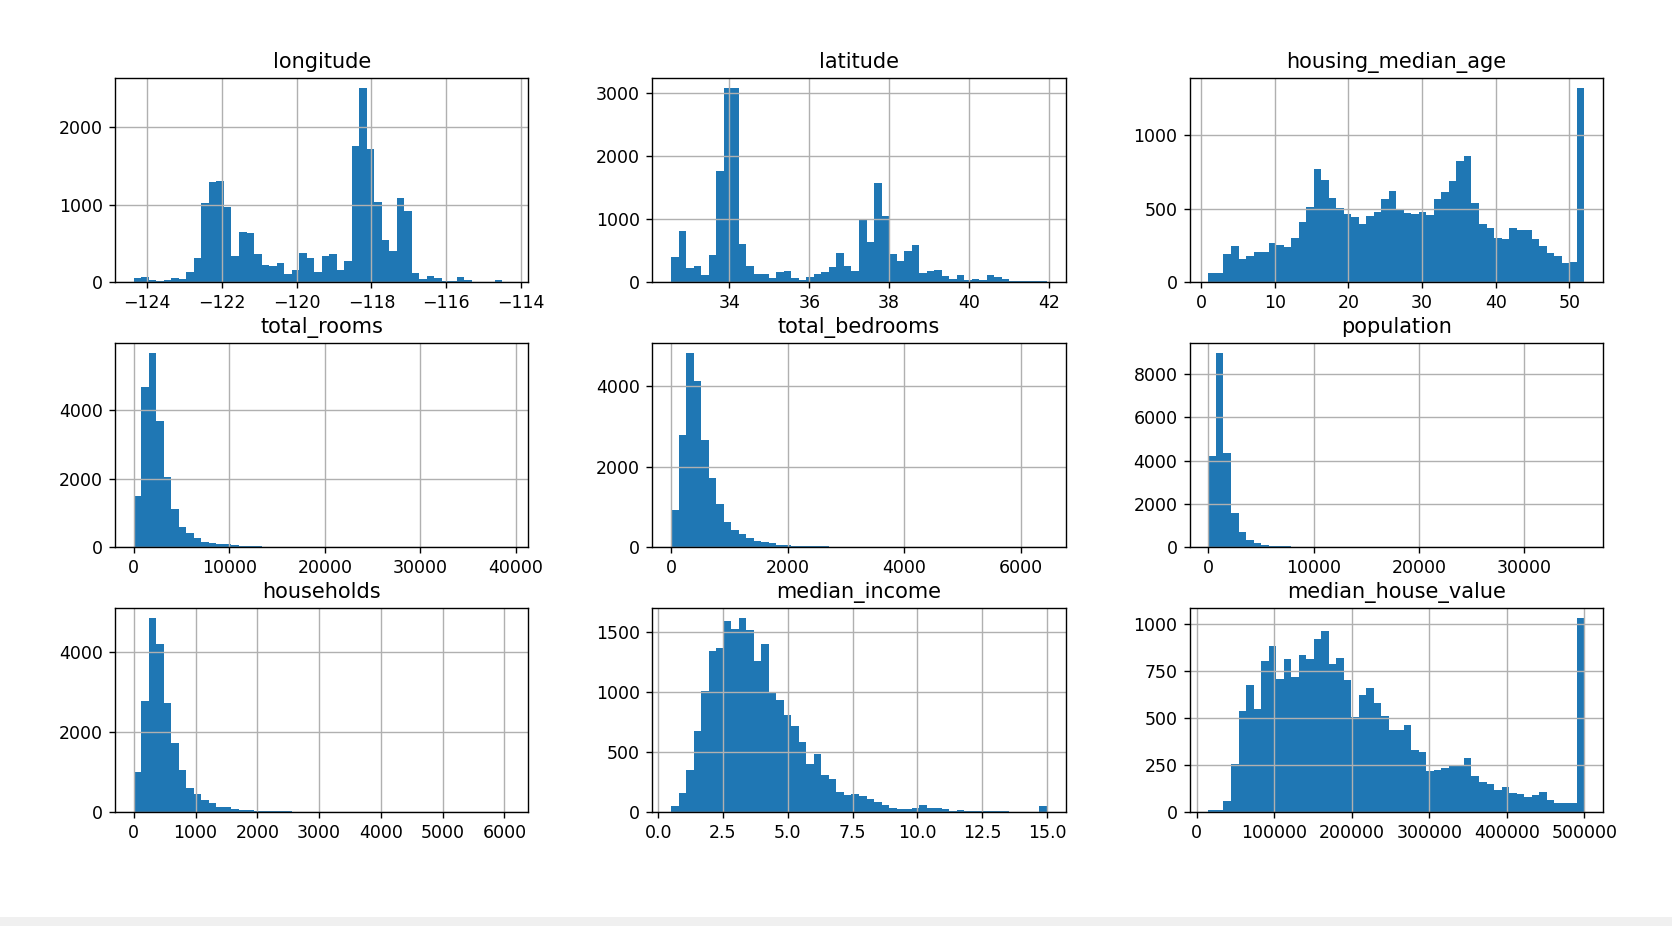

### Gráficos de Caixa das Variáveis Numéricas

Visualiza a dispersão e os outliers das variáveis numéricas.


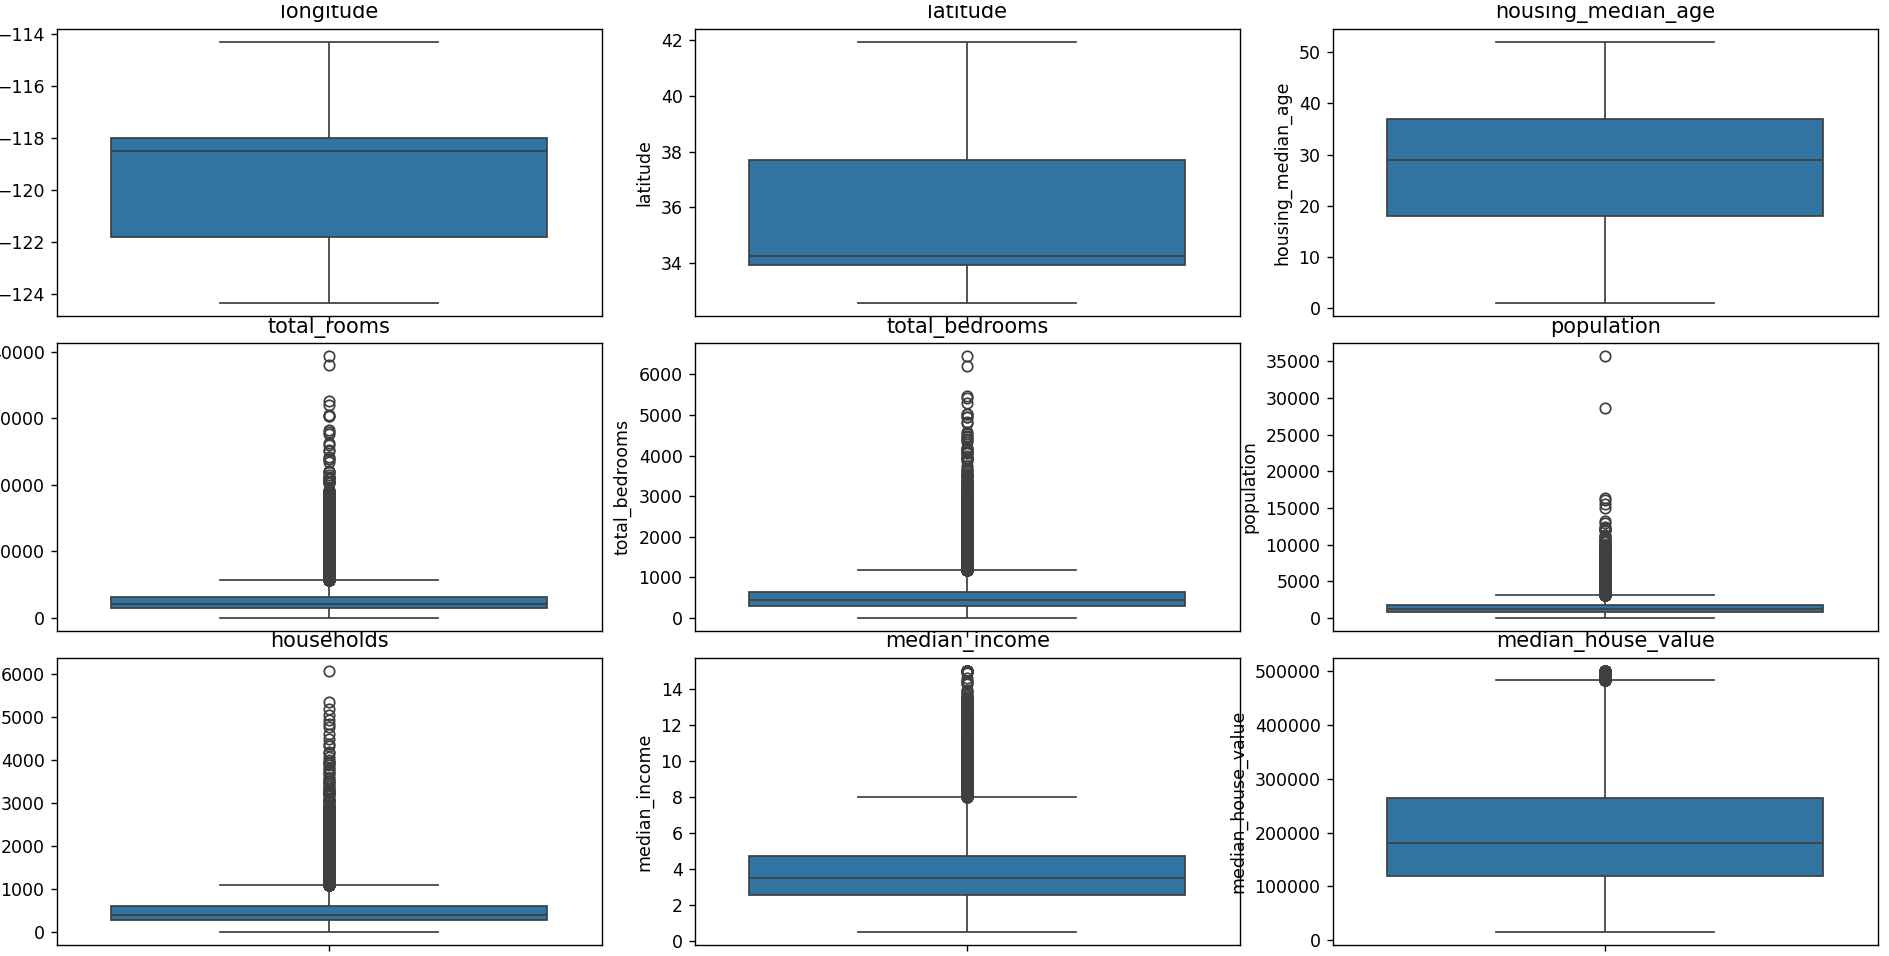

### Contagem das Categorias de Proximidade ao Oceano

Mostra a frequência de cada categoria na variável ocean_proximity.

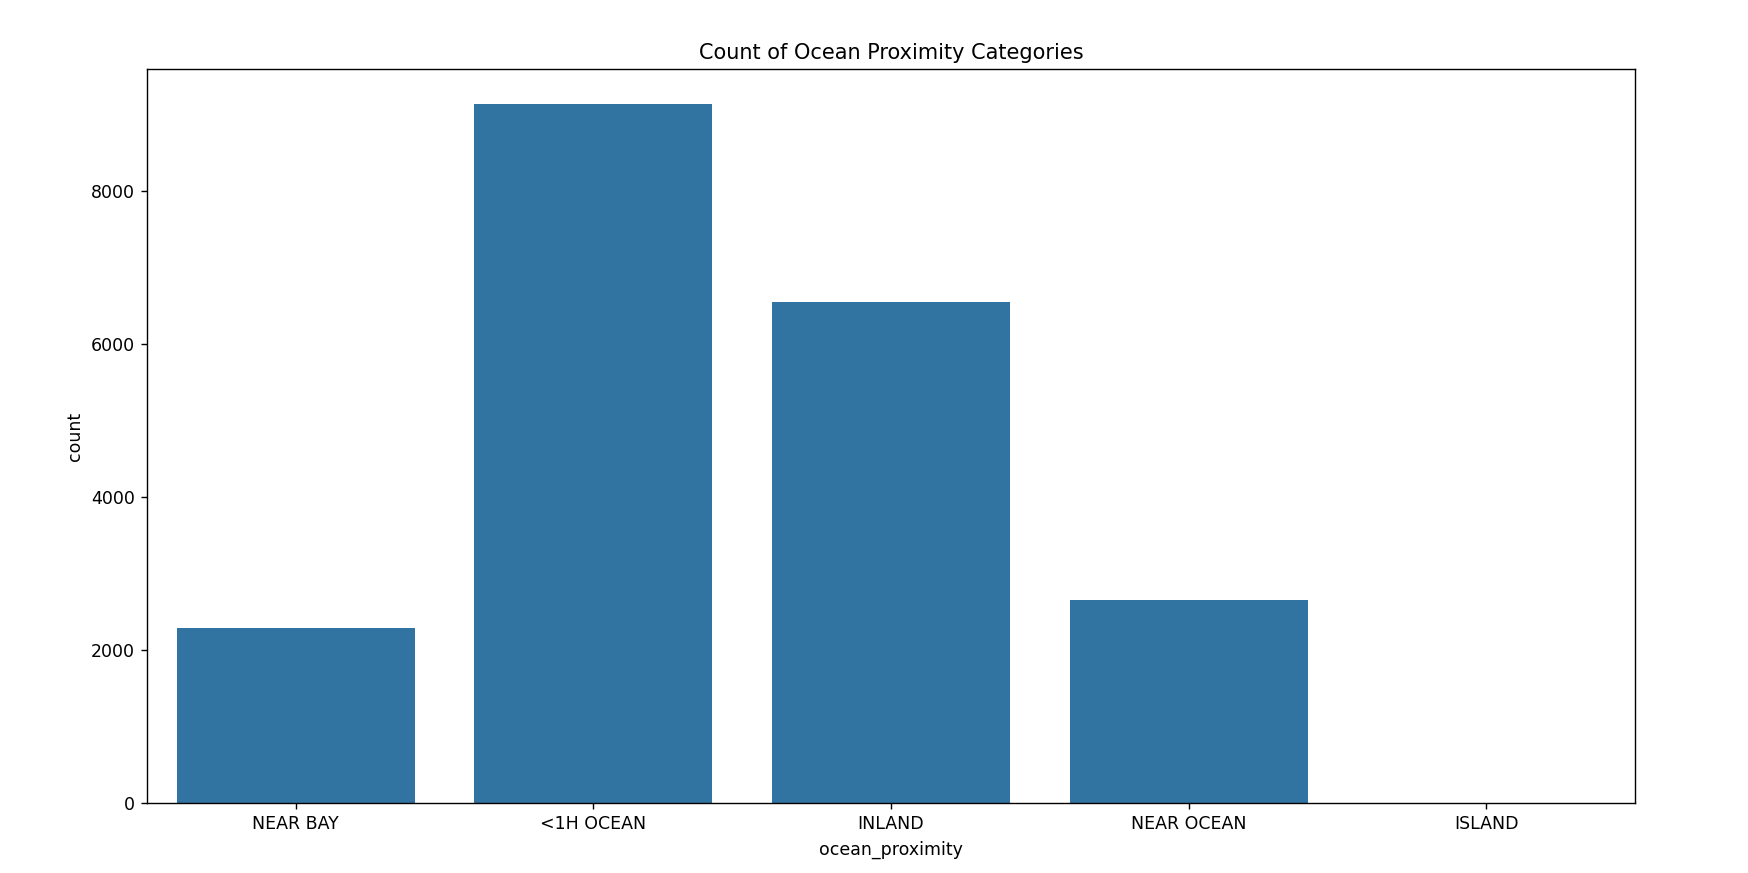

### Elbow Method para o optimal 𝑘 

Avalia o número ideal de clusters para o algoritmo K-Means utilizando a inércia.

### Análise de Silhueta para o optimal 𝑘

Mede o desempenho do clustering utilizando a pontuação de silhueta para diferentes valores de 𝑘.

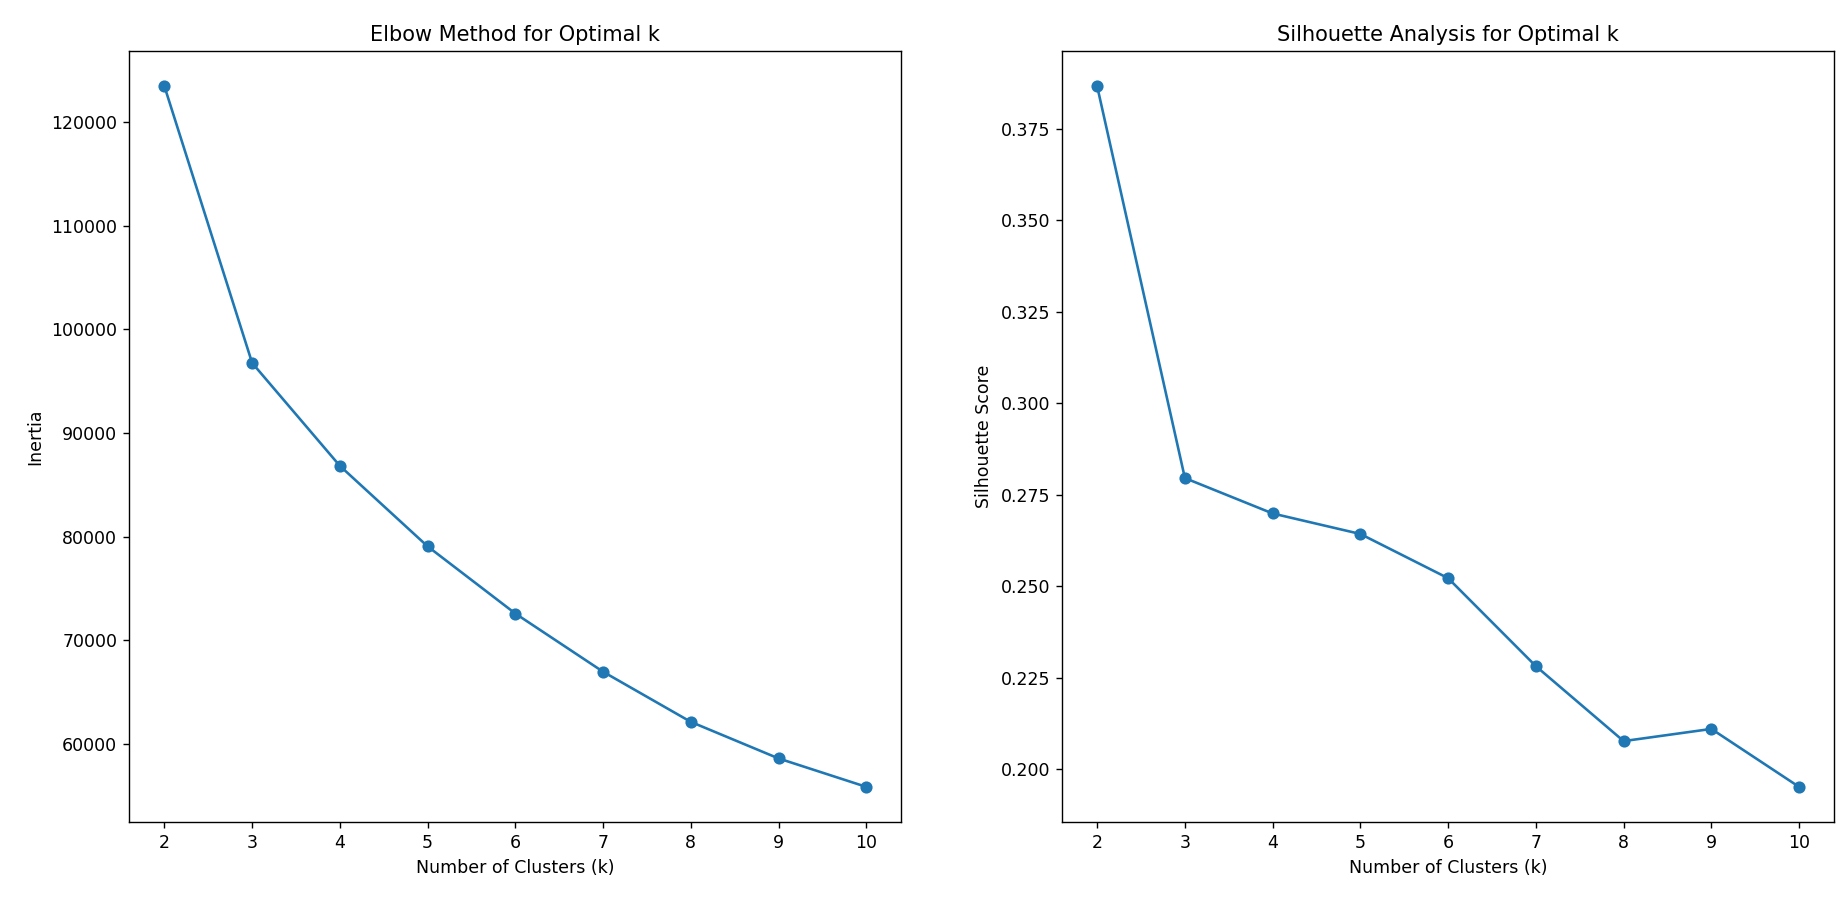

## Conclusão
Neste notebook, exploramos o dataset de habitação, aplicamos técnicas de regressão, clustering e data mining, gerando vários insights.
